<font size="5">**Проект: Телекоммуникации**</font>

**ОПИСАНИЕ ПРОЕКТА**

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. 

*Описание услуг*

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

*Описание данных*

Данные состоят из нескольких файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

**ЦЕЛИ ПРОЕКТА:**
Построить модель для прогноза оттока клиентов.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

## Шаг 1. Загрузка данных

### Загрузка и установка библиотек

In [1]:
!pip install phik -q
!pip install -U scikit-learn -q

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.model_selection import train_test_split #cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
#    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix, 
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    accuracy_score,
    RocCurveDisplay)

from sklearn.dummy import DummyClassifier

# Добавляем свои линии для легенды
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

### Загрузим данные

In [3]:
# Настроим параметры отображения pandas, чтобы отображать все элементы
pd.set_option('display.max_rows', None)  # Отображать все строки
pd.set_option('display.max_columns', None)  # Отображать все столбцы
pd.set_option('display.width', 1000)  # Увеличить ширину вывода, чтобы строки не переносились
pd.set_option('display.max_colwidth', None)  # Отображать содержимое столбцов полностью

In [4]:
# Сохраняем путь к файлам
# Локальный
way1 = '/Users/natali/Desktop/NT/Яндекс_практикум/Проекты/15. Выпускной проект/contract_new.csv'
way2 = '/Users/natali/Desktop/NT/Яндекс_практикум/Проекты/15. Выпускной проект/personal_new.csv'
way3 = '/Users/natali/Desktop/NT/Яндекс_практикум/Проекты/15. Выпускной проект/internet_new.csv'
way4 = '/Users/natali/Desktop/NT/Яндекс_практикум/Проекты/15. Выпускной проект/phone_new.csv'

# Альтернативная внутренняя ссылка Практикума
way1_pr = '/datasets/contract_new.csv'
way2_pr = '/datasets/personal_new.csv'
way3_pr = '/datasets/internet_new.csv'
way4_pr = '/datasets/phone_new.csv'

In [5]:
# Загружаем и сохраняем данные из датафреймров в переменные

# Создаем списки
way = [way1, way2, way3, way4] # Для локальных путей
way_pr = [way1_pr, way2_pr, way3_pr, way4_pr] # Для альтернативной внутренней ссылки Практикума

data_dict = {}

# Создаем функцию загрузки
def download_data(local_path, practicum_path, data_name): 
    """Загружает данные из CSV файла, сначала проверяя локальный путь, затем - путь практикума.
    Args:
        local_path (str): Локальный путь к файлу.
        practicum_path (str): Путь к файлу на платформе практикума.
        data_name (str): Имя переменной для сохранения данных.
    Returns:
        pandas.DataFrame: Загруженные данные.
    """
    try:
        if os.path.exists(local_path):
            print(f"Чтение данных из локального файла: {local_path}")
            data = pd.read_csv(local_path, sep=',', decimal = ',', index_col='customerID')
            data_dict[data_name] = data  # Сохраняем в словарь по имени переменной
            return data

        elif os.path.exists(practicum_path):
            print(f"Чтение данных из файла практикума: {practicum_path}")
            data = pd.read_csv(practicum_path, sep=',', decimal = ',', index_col='customerID')
            data_dict[data_name] = data  # Сохраняем в словарь по имени переменной
            return data
        else:
            print(f"Файл не найден: {local_path} или {practicum_path}")
            return None
    except Exception as e:
        print(f"Ошибка при чтении файла: {e}")
        return None

# Цикл для загрузки данных
data_names = ['df_1', 'df_2', 'df_3', 'df_4']  # Имена для датасетов
for i in range(len(way)):
    # Вызываем функцию загрузки и сохраняем результат в соответствующую переменную
    download_data(way[i], way_pr[i], data_names[i])

# Обращаемся к данным через словарь data_dict и сохраняем в переменные
df_contract = data_dict.get('df_1')
df_personal = data_dict.get('df_2')
df_internet = data_dict.get('df_3')
df_phone = data_dict.get('df_4')

Чтение данных из файла практикума: /datasets/contract_new.csv
Чтение данных из файла практикума: /datasets/personal_new.csv
Чтение данных из файла практикума: /datasets/internet_new.csv
Чтение данных из файла практикума: /datasets/phone_new.csv


### Проверим, что данные в таблицах соответствуют описанию

In [6]:
# Создаем список из датасетов
list_data = [df_contract, df_personal, df_internet, df_phone]

# Задаем каждой таблице имя
df_contract.name = 'Contract'
df_personal.name = 'Personal'
df_internet.name = 'Internet'
df_phone.name = 'Phone'

In [7]:
# Выводим 5 случайных строк датасетов
for data in list_data:
    print(f"5 случайных строк датасета: {data.name}")
    display(data.sample(5))
    print()

5 случайных строк датасета: Contract


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
3345-PBBFH,2019-06-01,No,Month-to-month,Yes,Bank transfer (automatic),49.55,396.4
2848-YXSMW,2014-02-01,2018-06-01,Two year,No,Credit card (automatic),19.4,1008.8
6465-GSRCL,2014-07-01,2017-11-01,One year,Yes,Bank transfer (automatic),106.6,4605.12
9297-FVVDH,2015-05-01,No,Two year,Yes,Electronic check,84.5,4816.5
0485-ZBSLN,2014-09-01,No,Two year,No,Credit card (automatic),24.75,1737.45



5 случайных строк датасета: Personal


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
9489-UTFKA,Male,1,Yes,No
9764-REAFF,Female,0,Yes,No
8150-QUDFX,Male,0,No,No
8845-LWKGE,Female,0,Yes,Yes
4910-AQFFX,Male,0,Yes,Yes



5 случайных строк датасета: Internet


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7359-PTSXY,DSL,No,No,No,No,No,No
5803-NQJZO,DSL,Yes,Yes,Yes,Yes,No,No
8967-SZQAS,DSL,No,Yes,No,No,No,No
2000-MPKCA,Fiber optic,Yes,Yes,Yes,No,Yes,Yes
4902-OHLSK,Fiber optic,No,No,No,Yes,Yes,Yes



5 случайных строк датасета: Phone


,MultipleLines
customerID,
6645-MXQJT,No
1162-ECVII,Yes
9281-CEDRU,No
1597-LHYNC,Yes
2886-KEFUM,Yes


### Вывод по разделу Шаг 1. Загрузка данных

Загружены и изучены данные четырех датасетов. Данные соответствуют описанию задачи.

## Шаг 2. Исследовательский анализ и предобработка данных
### Предобработка данных
#### Выведем общую информацию о датасетах

In [8]:
# Выводим информацию о датасетах
for data in list_data:
    print(f"Информация о датасете: {data.name}")
    print(data.info())
    print()

Информация о датасете: Contract
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BeginDate         7043 non-null   object
 1   EndDate           7043 non-null   object
 2   Type              7043 non-null   object
 3   PaperlessBilling  7043 non-null   object
 4   PaymentMethod     7043 non-null   object
 5   MonthlyCharges    7043 non-null   object
 6   TotalCharges      7043 non-null   object
dtypes: object(7)
memory usage: 440.2+ KB
None

Информация о датасете: Personal
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 no

#### Проверим данные на пропуски

In [9]:
# Проверяем данные на пропуски
for data in list_data:
    print(f"Пропуски в датасете: {data.name}")
    print(data.isna().sum())
    print()

Пропуски в датасете: Contract
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Пропуски в датасете: Personal
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Пропуски в датасете: Internet
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Пропуски в датасете: Phone
MultipleLines    0
dtype: int64



Пропуски отсутствуют.

#### Проверим наличие дубликатов

In [10]:
# Напишем функцию, которая будет возвращать уникальные значения данных датафрейма, чтобы определить наличие пропусков типа ' '
def print_unique(data):
    for col in data.columns:
        unique_values = data[col].sort_values().unique()
        print(f"Столбец: {col}")
        print(unique_values)
        print("-" * 30)  # Разделитель

In [11]:
# Проверяем наличие пропусков типа ' '
for data in list_data:
    print(f"Наличие неявных дубликатов в датасете: {data.name}")
    print(print_unique(data))
    print()

Наличие неявных дубликатов в датасете: Contract
Столбец: BeginDate
['2013-10-01' '2013-11-01' '2013-12-01' '2014-01-01' '2014-02-01'
 '2014-03-01' '2014-04-01' '2014-05-01' '2014-06-01' '2014-07-01'
 '2014-08-01' '2014-09-01' '2014-10-01' '2014-11-01' '2014-12-01'
 '2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01' '2016-01-01' '2016-02-01' '2016-03-01'
 '2016-04-01' '2016-05-01' '2016-06-01' '2016-07-01' '2016-08-01'
 '2016-09-01' '2016-10-01' '2016-11-01' '2016-12-01' '2017-01-01'
 '2017-02-01' '2017-03-01' '2017-04-01' '2017-05-01' '2017-06-01'
 '2017-07-01' '2017-08-01' '2017-09-01' '2017-10-01' '2017-11-01'
 '2017-12-01' '2018-01-01' '2018-02-01' '2018-03-01' '2018-04-01'
 '2018-05-01' '2018-06-01' '2018-07-01' '2018-08-01' '2018-09-01'
 '2018-10-01' '2018-11-01' '2018-12-01' '2019-01-01' '2019-02-01'
 '2019-03-01' '2019-04-01' '2019-05-01' '2019-06-01' '2019-07-01'
 '2019-08

В столбце TotalCharges есть пропуски типа ' ', обработаем их далее.

In [12]:
# Выведем срез с пропусками в столбце TotalCharges
df_contract.query('TotalCharges == " "')

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.0,
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.7,


Информация о договорах актуальна на 1 февраля 2020 года. Все договоры с пропусками в столбце TotalCharges заключены 2020-02-01. В связи с чем приравняем значения столбца TotalCharges значению столбца MonthlyCharges.

In [13]:
# Находим индексы строк, где TotalCharges равен пробелу
mask = df_contract['TotalCharges'] == ' '

# Заменяем пробелы в TotalCharges на значения из MonthlyCharges
df_contract.loc[mask, 'TotalCharges'] = df_contract.loc[mask, 'MonthlyCharges']

# Проверим результат
df_contract.query('TotalCharges == " "')

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,


In [14]:
# Проверяем наличие полных дубликатов
for data in list_data:
    print(f"Наличие полных дубликатов в датасете: {data.name}")
    print(data.duplicated().sum())
    print()

Наличие полных дубликатов в датасете: Contract
37

Наличие полных дубликатов в датасете: Personal
7027

Наличие полных дубликатов в датасете: Internet
5389

Наличие полных дубликатов в датасете: Phone
6359



Наличие дубликатов вызвано установкой столбца customerID в качестве индекса. На этапе обучения моделей и после объединения таблиц удалим дубликаты при их наличии.

#### Преобразуем тип данных

In [15]:
# Преобразовываем столбцы в datetime
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], errors='coerce') 
#обрабатываем EndDate (с заменой "No" на NaT)

# Преобразовываем столбцы в float
df_contract['MonthlyCharges'] = df_contract['MonthlyCharges'].astype(float)
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)

# Проверим результат
print(df_contract.dtypes)

BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
dtype: object


In [16]:
# Преобразовываем столбцы в object
df_personal['SeniorCitizen'] = df_personal['SeniorCitizen'].astype(object)

# Проверим результат
print(df_personal.dtypes)

gender           object
SeniorCitizen    object
Partner          object
Dependents       object
dtype: object


### Исследовательский анализ данных
Исследуем все признаки и сделаем выводы о том, как их нужно подготовить.
#### Статистический анализ данных

In [17]:
# Напишем функцию для проведения статистического анализа
def stat_data(data):
    # Анализ числовых признаков (только если они есть)
    num_cols = data.select_dtypes(include=['number']).columns
    
    if len(num_cols) > 0:
        print('Характеристики числовых признаков:')
        data_describe = data[num_cols].describe().T
           
        try:
            # Добавляем коэффициент вариации (только для столбцов с mean != 0)
            data_describe['var'] = data_describe.apply(
                lambda x: (x['std'] / x['mean'] * 100) if x['mean'] != 0 else np.nan,
                axis=1
            )
            display(data_describe)
            
        except ZeroDivisionError:
            print("Предупреждение: невозможно вычислить коэффициент вариации (деление на ноль).")
            display(data_describe)
            
        except Exception as e:
            print(f"Ошибка при анализе числовых признаков: {e}")
    else:
        print("Числовые признаки отсутствуют.")
    
    # Проводим анализ категориальных признаков:    
    cat_col_names = data.select_dtypes(exclude=['number']).columns # Список категориальных признаков
    if len(cat_col_names) > 0:
        print('Характеристики категориальных признаков')
        print(data[cat_col_names].nunique()) # Выводим количество уникальных значений в категориальных признаках
    else:
        pass

In [18]:
for data in list_data:
        print(f"Cтатистический анализ данных датасета: {data.name}")        
        stat_data(data)
        print()

Cтатистический анализ данных датасета: Contract
Характеристики числовых признаков:


,count,mean,std,min,25%,50%,75%,max,var
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75,46.462725
TotalCharges,7043.0,2115.377573,2112.678861,19.05,436.75,1343.35,3236.69,9221.38,99.872424


Характеристики категориальных признаков
BeginDate           77
EndDate             66
Type                 3
PaperlessBilling     2
PaymentMethod        4
dtype: int64

Cтатистический анализ данных датасета: Personal
Числовые признаки отсутствуют.
Характеристики категориальных признаков
gender           2
SeniorCitizen    2
Partner          2
Dependents       2
dtype: int64

Cтатистический анализ данных датасета: Internet
Числовые признаки отсутствуют.
Характеристики категориальных признаков
InternetService     2
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
dtype: int64

Cтатистический анализ данных датасета: Phone
Числовые признаки отсутствуют.
Характеристики категориальных признаков
MultipleLines    2
dtype: int64



#### Построим графики для каждого признака

In [19]:
# Напишем функцию для построения графиков
def graph_eda(data):
    # 1. Определяем, какие столбцы являются числовыми, а какие - дискретными
    numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

    # Определяем дискретные признаки (целочисленные с небольшим числом уникальных значений)
    discrete_cols = []
    for col in numerical_cols:
        if (data[col].dtype in ['int64', 'int32', 'int16', 'int8']) and (data[col].nunique() <= 20):
            discrete_cols.append(col)

    # Оставшиеся числовые признаки
    continuous_cols = [col for col in numerical_cols if col not in discrete_cols]

    # 2. Устанавливаем размер графиков по умолчанию 
    plt.rcParams["figure.figsize"] = (10, 5)

    # 3. Строим гистограммы для непрерывных числовых признаков
    if continuous_cols:
        print('Гистограммы для непрерывных числовых признаков')
        if continuous_cols:
            for i, col in enumerate(continuous_cols):
                plt.subplot(len(continuous_cols)//2 + (len(continuous_cols)%2) , 2, i + 1) # Гибкое количество строк и столбцов
                sns.histplot(data=data, x=col, kde=True)
                plt.title(f'Распределение {col}')
            plt.tight_layout()
            plt.show()
    else:
        pass

    # 4. Боксплоты для числовых (непрерывных) признаков
    if continuous_cols:
        print('Боксплоты для числовых (непрерывных) признаков')
        if continuous_cols:
            for i, col in enumerate(continuous_cols):
                plt.subplot(len(continuous_cols)//2 + (len(continuous_cols)%2), 2, i + 1)
                sns.boxplot(data=data, x=col)  # Boxplot по горизонтали
                plt.title(f'Диаграмма размаха {col}')
            plt.tight_layout()
            plt.show()
    else:
        pass       
        
    # 5. Строим countplot для дискретных признаков
    if discrete_cols:
        print('Сountplot для дискретных признаков')
        if discrete_cols:
            for i, col in enumerate(discrete_cols):
                plt.subplot(len(discrete_cols)//2 + (len(discrete_cols)%2), 2, i + 1)  # Гибкое количество строк и столбцов
                sns.countplot(data=data, x=col)
                plt.title(f'Распределение {col}')
                plt.xticks(rotation=0) # Поворачиваем надписи на оси X для читаемости
            plt.tight_layout()
            plt.show()
    else:
        pass
            
    # 6. Строим Bar plot для категориальных признаков

    # Определяем категориальные признаки
    exclude_cols = {'BeginDate', 'EndDate'}
    cat_col_names = [col for col in data.select_dtypes(exclude=['number']).columns 
                if col not in exclude_cols]
    if len(cat_col_names) > 0:
        print('Bar plot для категориальных признаков')
        
        # Перебераем все категориальные признаки и строим графики
        for cat_col_names in cat_col_names:
            plt.figure(figsize=(6, 3))  # Задаем размер графика для читаемости
            data[cat_col_names].value_counts().plot.bar()
            plt.title(f'{cat_col_names}')
            plt.xlabel(cat_col_names)
            plt.ylabel('Количество')
            plt.grid(True)
#            plt.legend()  
            plt.xticks(rotation=10, ha='right') # Поворот подписей оси x для лучшей читаемости
            plt.tight_layout()  # Предотвращаем обрезку подписей
            plt.show()   
    else:
        pass            

Contract
Гистограммы для непрерывных числовых признаков


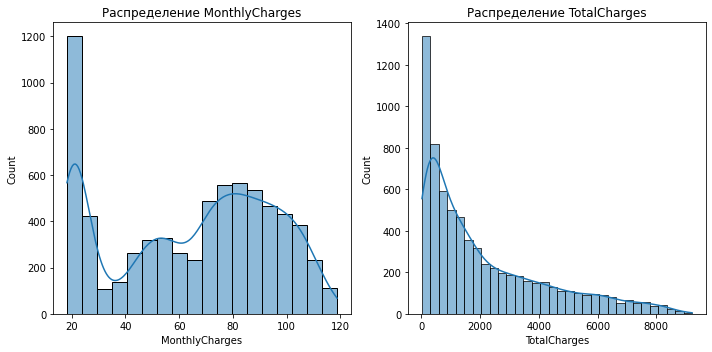

Боксплоты для числовых (непрерывных) признаков


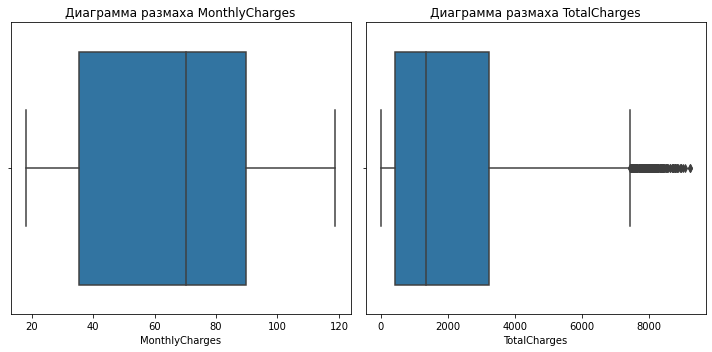

Bar plot для категориальных признаков


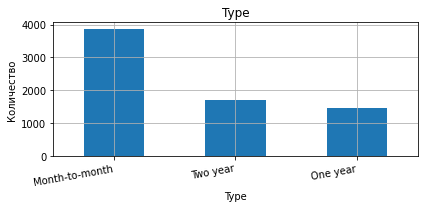

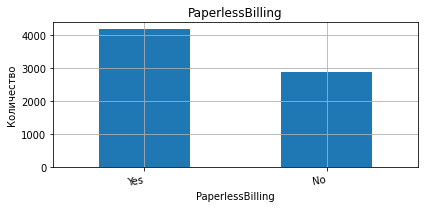

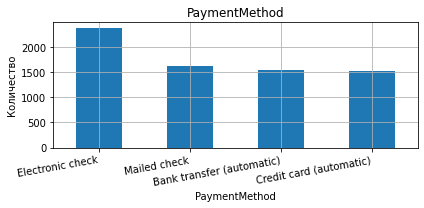

None

Personal
Bar plot для категориальных признаков


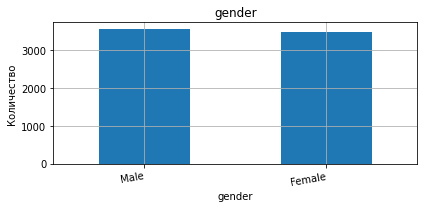

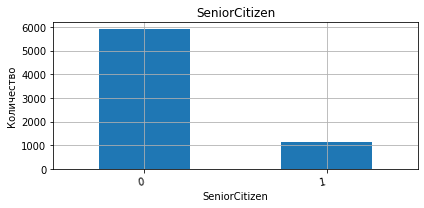

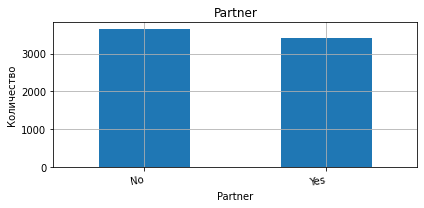

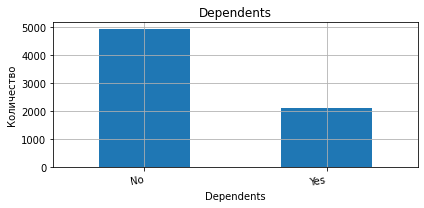

None

Internet
Bar plot для категориальных признаков


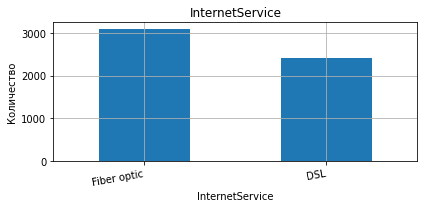

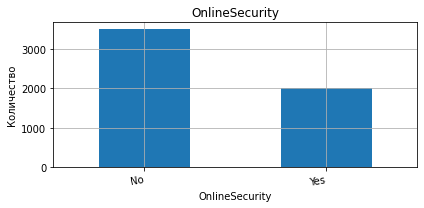

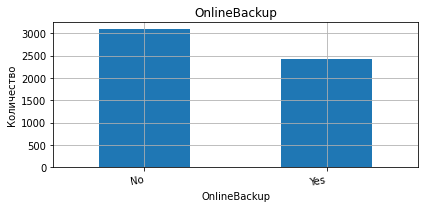

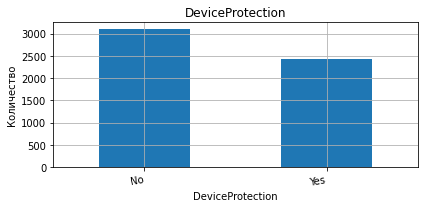

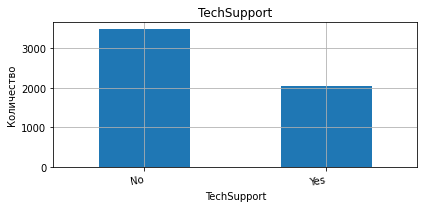

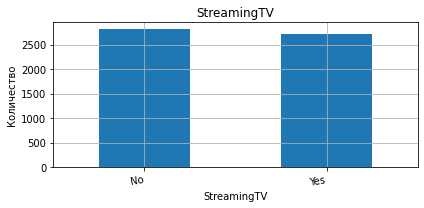

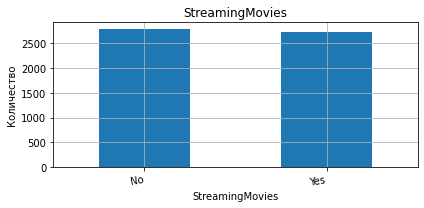

None

Phone
Bar plot для категориальных признаков


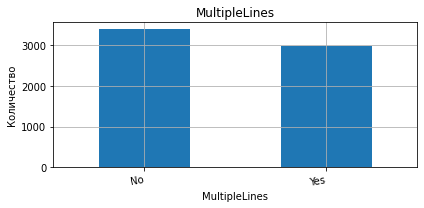

None



In [20]:
# Выводим графики
for data in list_data:
    print(data.name)
    print(graph_eda(data))
    print()

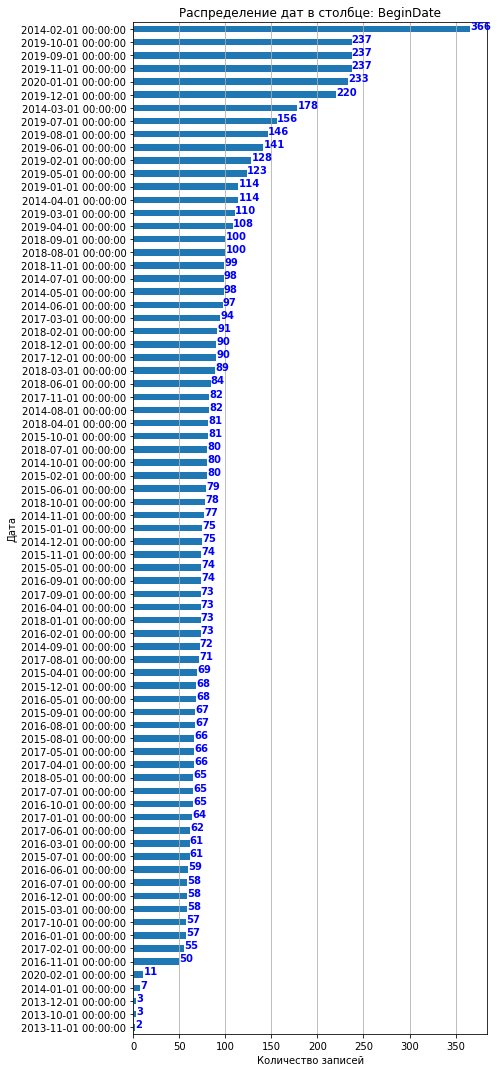

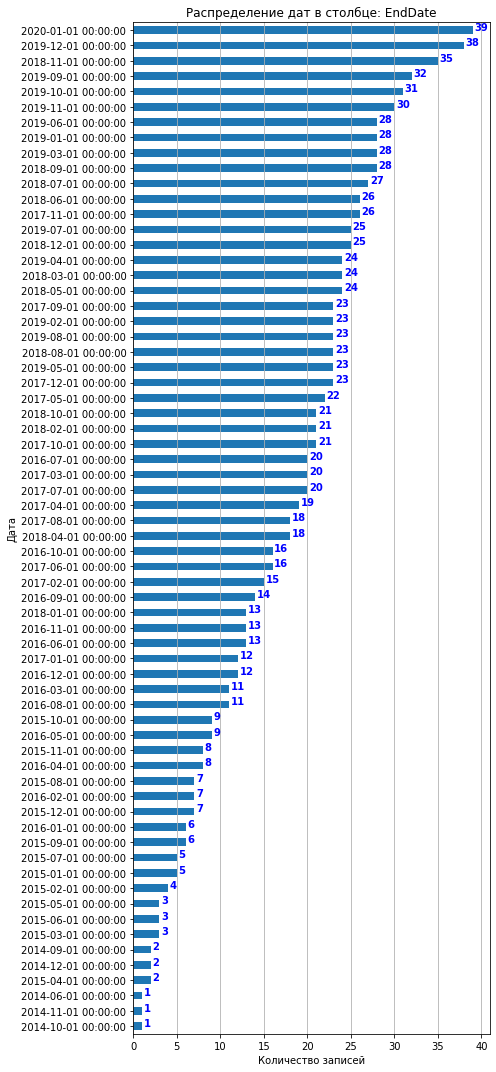

In [21]:
# Отдельно выведем графики для столбцов 'BeginDate', 'EndDate'
col_names = ['BeginDate', 'EndDate']

for col in col_names:
    plt.figure(figsize=(7, 15))  # Увеличим размер для лучшей читаемости дат
    
    # Сортируем значения по убыванию для более наглядного отображения
    value_counts = df_contract[col].value_counts().sort_values(ascending=True)
    
    # Строим горизонтальный барплот
    value_counts.plot.barh()
    
    plt.title(f'Распределение дат в столбце: {col}')
    plt.xlabel('Количество записей')
    plt.ylabel('Дата')
    plt.grid(True, axis='x')  # Добавляем сетку только по оси X
    
    # Добавляем аннотации с количеством
    for i, v in enumerate(value_counts):
        plt.text(v + 0.2, i, str(v), color='blue', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### Вывод по разделу Шаг 2. Исследовательский анализ и предобработка данных

Проведена предобработка данных:
    - данные проверены на пропуски;
    - данные проверены на наличие дубликатов;
    - преобразованы типы данных.
    
Проведен исследовательский анализ данных:
    - статистический анализ выявил значительный разброс значений сумм общих расходов абонента от 19.05 до 9221.38. Диаграммы размаха для признаков Расходы за месяц и Общие расходы абонента демонстрируют распределение со смещением, у признака Общие расходы абонента имеются выбросы.
    
Большая часть клиентов предпочитает ежемесячно оплачивать электронный чек с получением электронного расчетного листа. При этом наиболее распространенный портрет клиентов - это мужчины или женщины (в равной степени), не являющиеся пенсионерами, состоящие в браке или холостые (в равной степени) без детей, подключившие интренет по отптоволокну без дополнительных услуг, а также подключившие телефонию без подключения телефона к нескольким линиям одновременно.

## Шаг 3. Объединение данных и предобработка

In [22]:
merged_df = pd.concat([df_contract, df_personal, df_internet, df_phone], axis=1)

In [23]:
print(f"Размер объединенного датафрейма: {merged_df.shape}")
print(f"Пропуски после объединения:\n{merged_df.isna().sum()}")
merged_df.head()

Размер объединенного датафрейма: (7043, 19)
Пропуски после объединения:
BeginDate              0
EndDate             5942
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Заполним пропуски в столбцах из таблиц internet_new.csv и phone_new.csv значением 'Not Connected', которое будет обозначать отсутствие пакета услуг.

In [24]:
# Список столбцов для обработки
columns_to_fill = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'MultipleLines'
]

# Заменяем пропуски на "Not Connected" в указанных столбцах
merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna('Not Connected')

# Проверяем результат
print(merged_df[columns_to_fill].isna().sum())  

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64


Пропуски в EndDate обрабатывать не будем. Вместо этого создадим новый бинарный признак и удалим старый столбец.

In [25]:
# EndDate содержит даты и пропуски (NaN)
merged_df['Churn'] = merged_df['EndDate'].notna().astype(int)

# Проверка результата
print(merged_df[['EndDate', 'Churn']].sample(5))

           EndDate  Churn
customerID               
7903-CMPEY     NaT      0
1927-QEWMY     NaT      0
3682-YEUWS     NaT      0
5173-ZXXXL     NaT      0
0305-SQECB     NaT      0


Удалим исходный столбец EndDate и столбец gender, поскольку 2 класса в нем распределены в равной степени.

In [26]:
# Удаление исходного столбца (опционально)
merged_df = merged_df.drop(['EndDate'], axis=1)

# Проверка результата
merged_df.head()

,BeginDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,Not Connected,0
5575-GNVDE,2017-04-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0
7795-CFOCW,2016-05-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,Not Connected,0
9237-HQITU,2019-09-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0


In [27]:
# Проверяем наличие полных дубликатов
print(f"Наличие полных дубликатов в объединенном датасете")
print(merged_df.duplicated().sum())

Наличие полных дубликатов в объединенном датасете
4


In [28]:
# Удалим полные дубликаты
merged_df = merged_df.drop_duplicates()

# Проверяем результат
print(f"Наличие полных дубликатов в объединенном датасете")
print(merged_df.duplicated().sum())

Наличие полных дубликатов в объединенном датасете
0


### Вывод по разделу Шаг 3. Объединение данных и предобработка

Объединение четырех таблиц выполнено с помощью метода concat() для сохранения полного набора данных без потерь. 

Проведена предобработка данных:
- заполнены пропуски в категориальных признаках;
- создан новый целевой бинарный признак Churn и удален старый признак EndDate.

## Шаг 4. Исследовательский анализ объединённого датафрейма

### Исследовательский анализ данных

In [29]:
print(f"Cтатистический анализ данных датасета: {data.name}")        
stat_data(merged_df)

Cтатистический анализ данных датасета: Phone
Характеристики числовых признаков:


,count,mean,std,min,25%,50%,75%,max,var
MonthlyCharges,7039.0,64.773000,30.079738,18.25,35.55,70.35,89.85,118.75,46.438698
TotalCharges,7039.0,2115.147585,2111.731243,19.05,437.50,1343.35,3236.69,9221.38,99.838482
Churn,7039.0,0.156414,0.363273,0.00,0.00,0.00,0.00,1.00,232.250837


Характеристики категориальных признаков
BeginDate           77
Type                 3
PaperlessBilling     2
PaymentMethod        4
gender               2
SeniorCitizen        2
Partner              2
Dependents           2
InternetService      3
OnlineSecurity       3
OnlineBackup         3
DeviceProtection     3
TechSupport          3
StreamingTV          3
StreamingMovies      3
MultipleLines        3
dtype: int64


Гистограммы для непрерывных числовых признаков


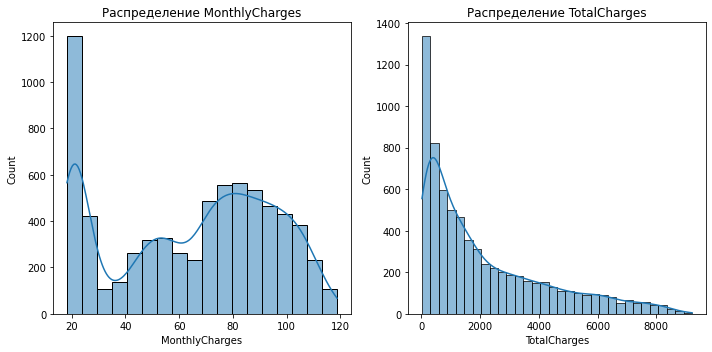

Боксплоты для числовых (непрерывных) признаков


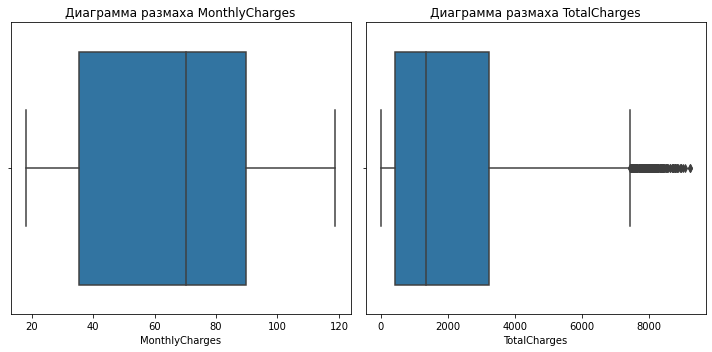

Сountplot для дискретных признаков


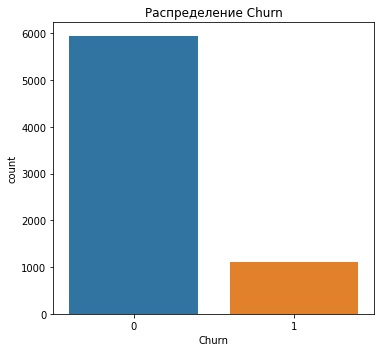

Bar plot для категориальных признаков


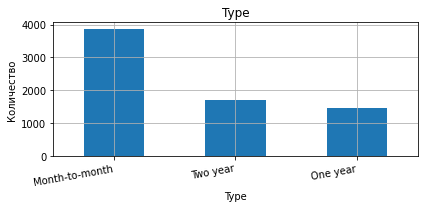

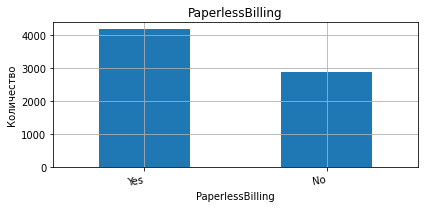

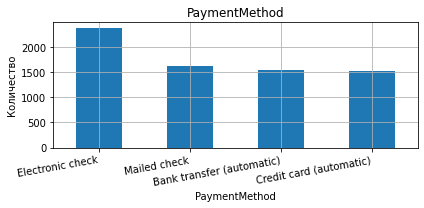

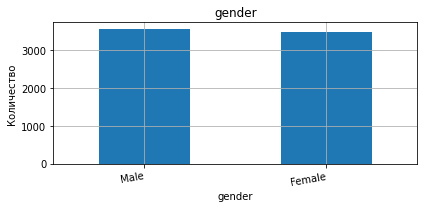

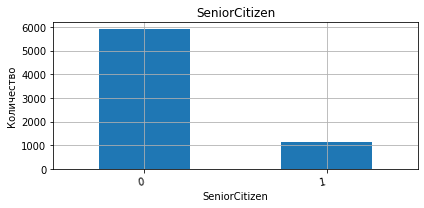

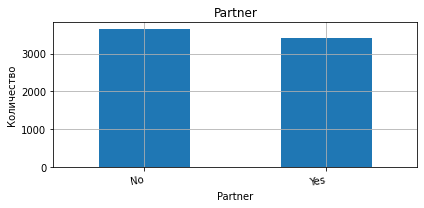

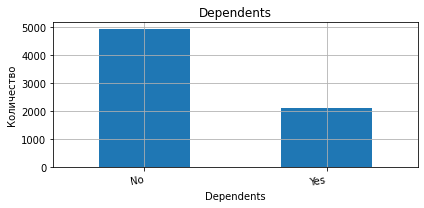

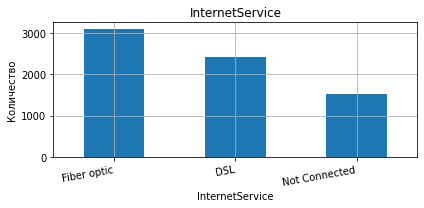

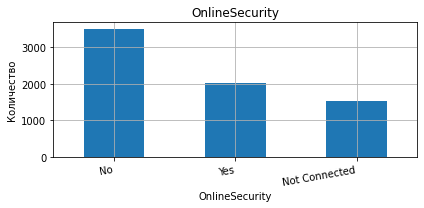

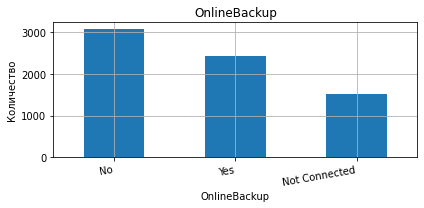

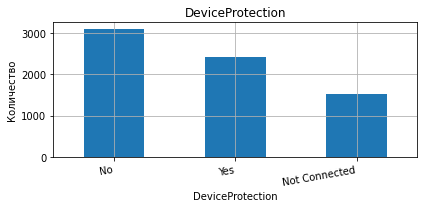

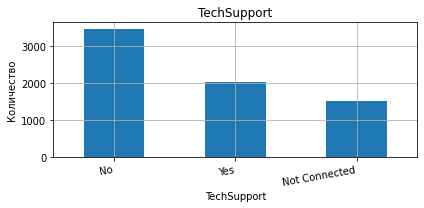

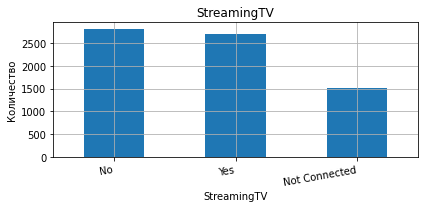

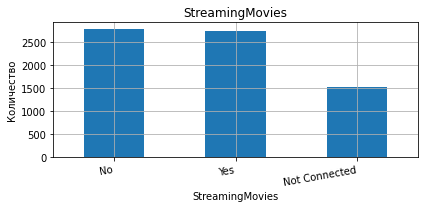

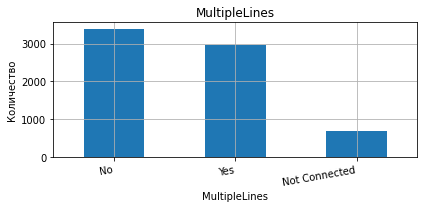

In [30]:
# Выводим графики
graph_eda(merged_df)

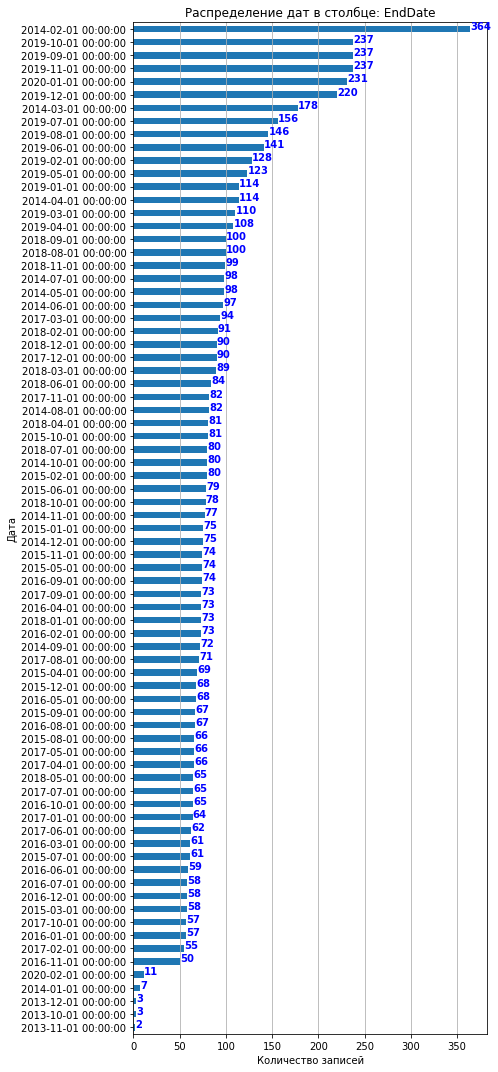

In [31]:
# Отдельно выведем график для столбца 'BeginDate'
plt.figure(figsize=(7, 15))  # Увеличим размер для лучшей читаемости дат
    
# Сортируем значения по убыванию для более наглядного отображения
value_counts = merged_df['BeginDate'].value_counts().sort_values(ascending=True)
    
# Строим горизонтальный барплот
value_counts.plot.barh()
    
plt.title(f'Распределение дат в столбце: {col}')
plt.xlabel('Количество записей')
plt.ylabel('Дата')
plt.grid(True, axis='x')  # Добавляем сетку только по оси X
    
# Добавляем аннотации с количеством
for i, v in enumerate(value_counts):
    plt.text(v + 0.2, i, str(v), color='blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [32]:
print("\nРаспределение классов:")
print(merged_df['Churn'].value_counts(normalize=True))


Распределение классов:
0    0.843586
1    0.156414
Name: Churn, dtype: float64


Результаты исследовательского анализа данных датасета после объединения аналогичны результатам анализа каждой из таблиц в отдельности.

Статистический анализ выявил значительный разброс значений сумм общих расходов абонента от 19.05 до 9221.38. Диаграммы размаха для признаков Расходы за месяц и Общие расходы абонента демонстрируют распределение со смещением, у признака Общие расходы абонента имеются выбросы.

Большая часть клиентов предпочитает ежемесячно оплачивать электронный чек с получением электронного расчетного листа. При этом наиболее распространенный портрет клиентов - это мужчины или женщины (в равной степени), не являющиеся пенсионерами, состоящие в браке или холостые (в равной степени) без детей, подключившие интренет по отптоволокну без дополнительных услуг, а также подключившие телефонию без подключения телефона к нескольким линиям одновременно.

Целевой признак имеет дисбаланс в распределении классов: 84% - действующие клиенты, 16% - клиенты расторгнувшие договор.

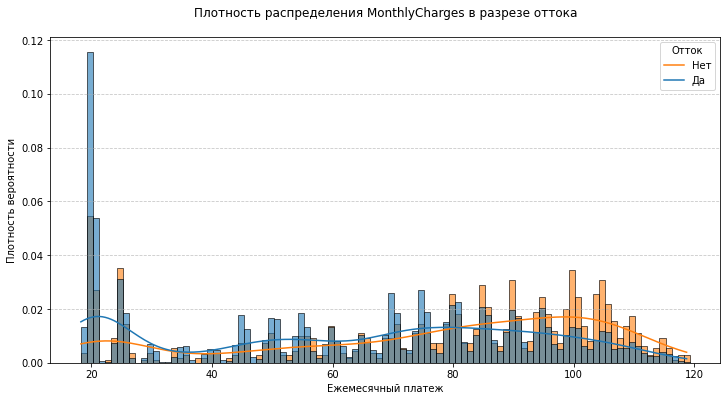

In [33]:
# MonthlyCharges (ежемесячные платежи)
plt.figure(figsize=(12, 6))
sns.histplot(
    data=merged_df,
    x='MonthlyCharges',
    hue='Churn',
    stat='density',
    common_norm=False,  # Нормируем каждую группу отдельн
    binwidth=1,         # Ширина корзины
    kde=True,           # Добавляем ядерную оценку плотности
    alpha=0.6           # Прозрачность для лучшей читаемости
)
plt.title('Плотность распределения MonthlyCharges в разрезе оттока', pad=20)
plt.xlabel('Ежемесячный платеж')
plt.ylabel('Плотность вероятности')
plt.legend(title='Отток', labels=['Нет', 'Да'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Клиенты с платежами >70 имеют значительно более высокую плотность оттока (оранжевая кривая выше синей).
- Пик оттока наблюдается в диапазоне 70–110.
- Клиенты с низкими тарифами (<30) реже уходят.

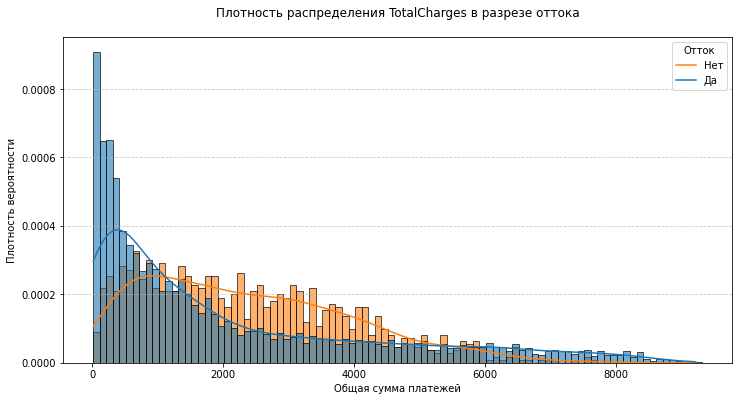

In [34]:
# TotalCharges (общая сумма платежей)
plt.figure(figsize=(12, 6))
sns.histplot(
    data=merged_df,
    x='TotalCharges',
    hue='Churn',
    stat='density',
    common_norm=False,
    binwidth=100,  # Группируем по $100  
    kde=True,
    alpha=0.6
)
plt.title('Плотность распределения TotalCharges в разрезе оттока', pad=20)
plt.xlabel('Общая сумма платежей')
plt.ylabel('Плотность вероятности')
plt.legend(title='Отток', labels=['Нет', 'Да'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Новые клиенты (TotalCharges < 500) уходят чаще — вероятно, недовольны качеством услуг или не видят ценности.
- Долгосрочные клиенты (TotalCharges > 4000) почти не подвержены оттоку (плотность оранжевой кривой близка к нулю).
- Критический диапазон: 0–2000 (здесь отток превышает сохранение).

In [35]:
# Функция для визуализации оттока по категориям
def plot_categorical_churn(df, feature, threshold_line=True, rotation=45):
    plt.figure(figsize=(10, 6))
    
    # Сортируем категории по уровню оттока (для наглядности)
    order = df.groupby(feature)['Churn'].mean().sort_values(ascending=False).index
    
    # Строим barplot с долей оттока для каждой категории
    ax = sns.barplot(
        data=df,
        x=feature,
        y='Churn',
        estimator=lambda x: sum(x) / len(x) * 100,  # Процент оттока
        ci=None,  # Убираем доверительные интервалы
        order=order,  # Сортировка по оттоку
        palette='viridis'  # Цветовая схема
    )
    
    # Добавляем линию среднего оттока по компании
    if threshold_line:
        mean_churn = df['Churn'].mean() * 100
        plt.axhline(mean_churn, color='red', linestyle='--', 
                    label=f'Средний отток: {mean_churn:.1f}%')
    
    # Добавляем подписи с процентами
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.1f}%', 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
    plt.title(f'Уровень оттока по категории: {feature}', pad=20)
    plt.xlabel(feature)
    plt.ylabel('Процент оттока (%)')
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

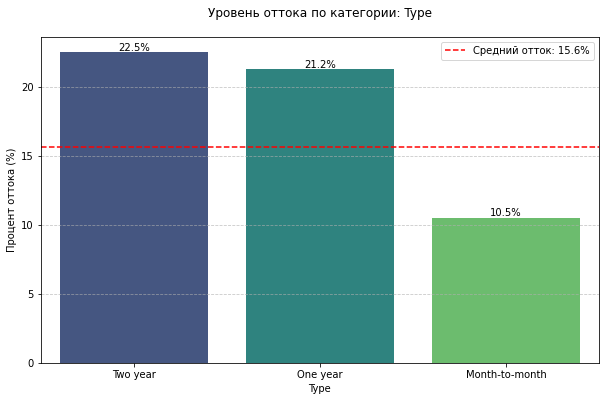

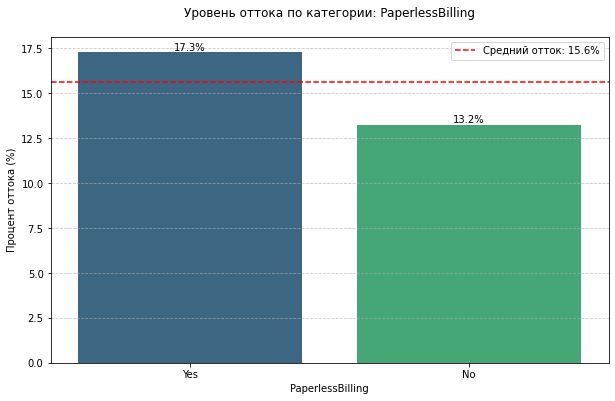

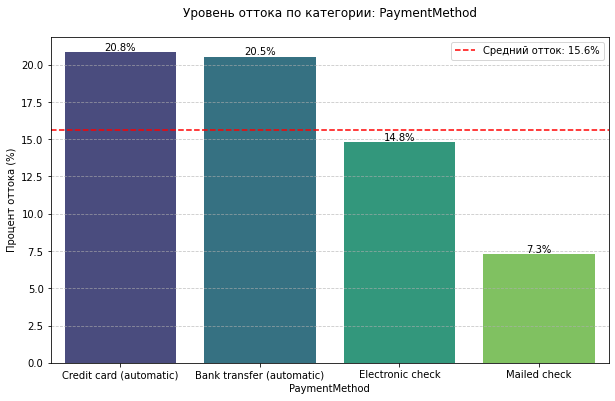

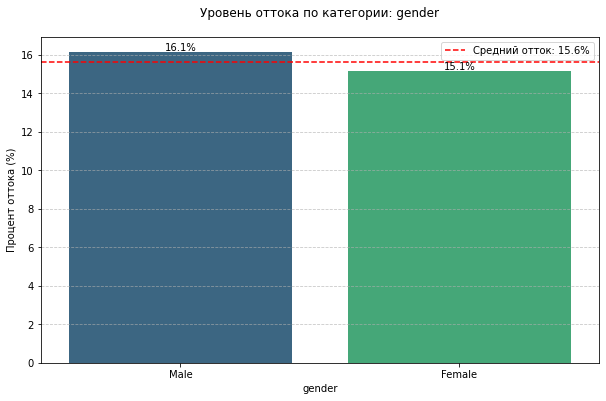

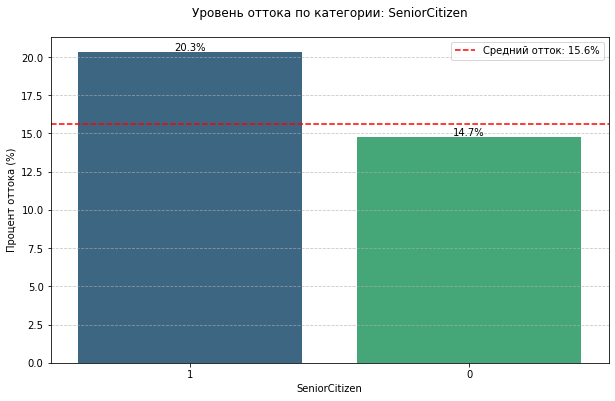

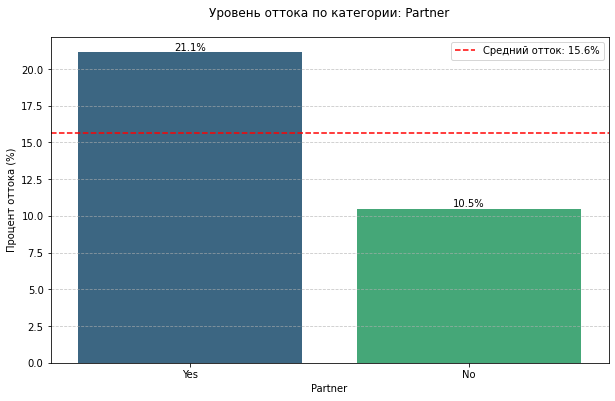

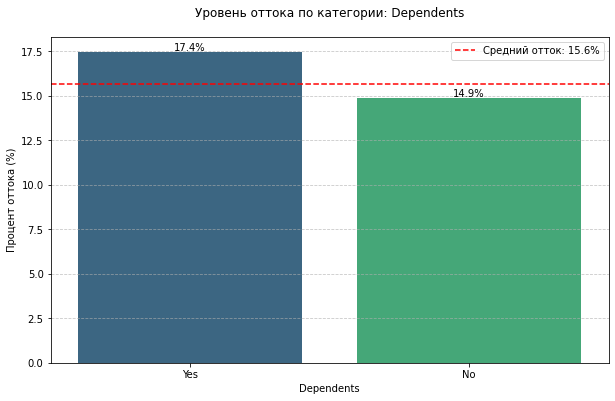

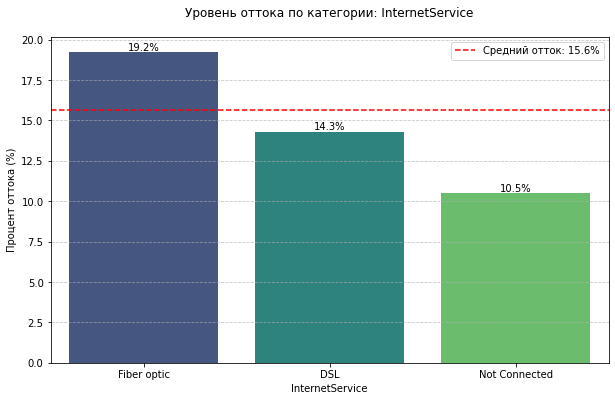

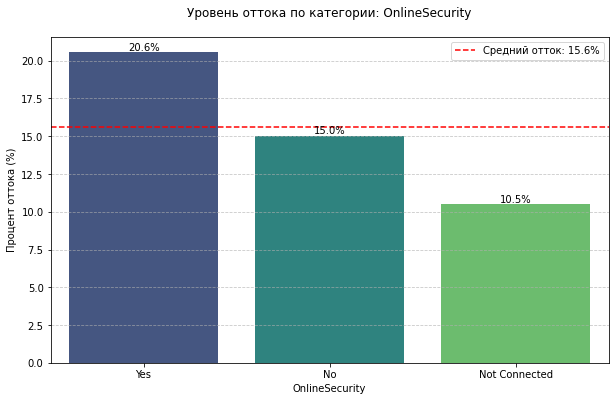

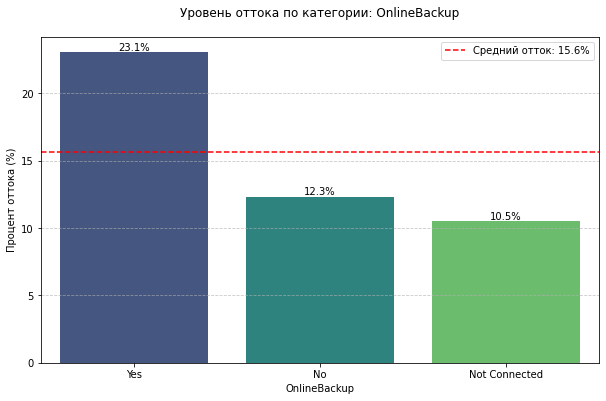

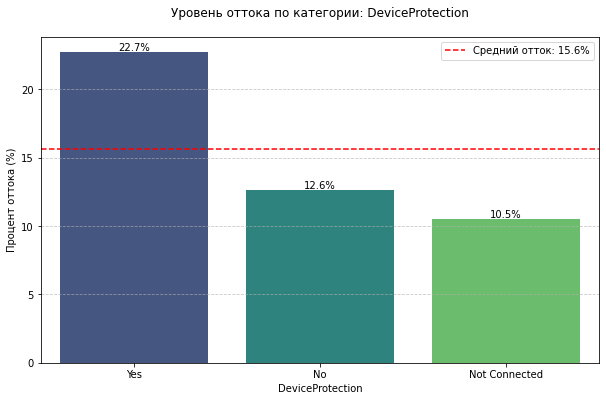

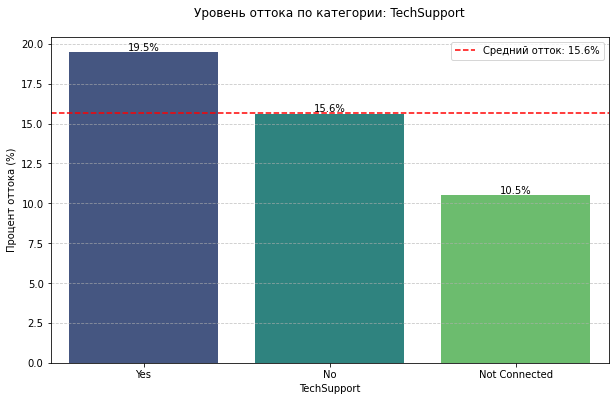

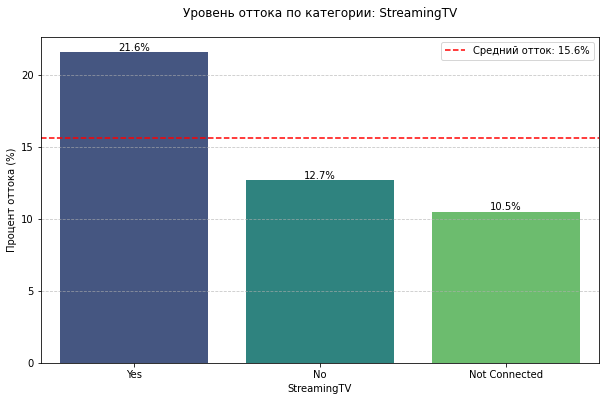

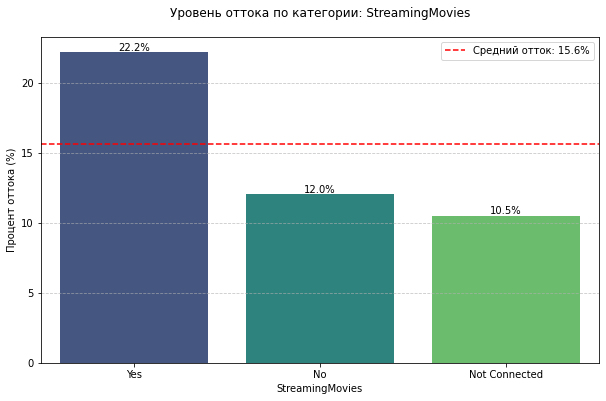

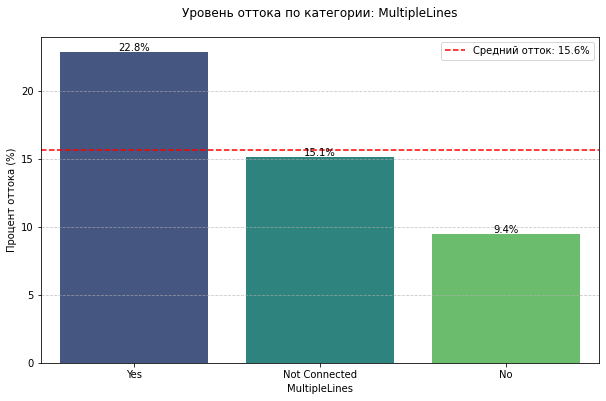

In [36]:
df_columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner',\
              'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in df_columns:
    plot_categorical_churn(merged_df, col, rotation=0)

Средний уровень оттока 15,6%.

1. Тип контракта (Type)
- Высокий отток: Клиенты с долгосрочными контрактами (One year, Two year) уходят чаще всего (22.5% и 21.2%, что выше среднего). 
- Низкий отток:  Клиенты с помесячным контрактом (Month-to-month) показывают отток ниже среднего (10.5%).

2. Электронный расчётный лист (PaperlessBilling)
- Клиенты без электронного расчётного листа (No) менее склонны к оттоку (13.2% против 17.3%).
Рекомендация: Улучшить пользовательский опыт электронного биллинга (например, добавить напоминания о платежах в мобильном приложении).

3. Способ оплаты (PaymentMethod)
- Критические категории: кредитные карты с автоматическим списанием (Credit card (automatic)) и банковские трансферы с автоматическим списанием (Bank transfer (automatic)) — 20.8% и 20,5% оттока.

Рекомендация: Рассылать напоминания перед автоматическим списанием.

4. Половая принадлежность gender
- Уровень оттока сопоставим для обоих категорий.

5. Демографические признаки
- Пожилые клиенты (SeniorCitizen): Высокий отток 20.3%.
- Семейные клиенты (Partner и Dependents): Высокий отток 21.1% и 17.4 соответственно.

Рекомендация: Для пожилых — упрощенная техподдержка; для семей — пакетные предложения.

6. Интернет-услуги (InternetService)
- Fiber optic: Максимальный отток (19.2%), вероятно из-за высокой стоимости или нестабильности.
- DSL: Отток близок к среднему (14.3%).

Рекомендация: Проверить качество Fiber optic, предложить гарантированный refund при обрывах.

7. Дополнительные услуги InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
- Высокий риск: Наличие услуги в пакете (отток 19.5–23.1%).
- Низкий риск: Отсутствие подключенного пакета услуг - отток 10.5%.

Рекомендация: Пересмотреть пакетные услуги и их стоимость.

8. Телефония (MultipleLines)
- Высокий риск: Отток среди пользователей с подключением телефона к нескольким линиям одновременно 22.8% (выше среднего).
- Низкий риск: Отсутствие подключенного пакета услуг - отток 9.4%.

Рекомендация: Пересмотреть услуги и ее стоимость.

Итоговые выводы. Группы максимального риска
- Клиенты с долгосрочными контрактами (One year, Two year)
- Клиенты с электронным расчётным листом
- Кредитные карты с автоматическим списанием (Credit card (automatic)) и банковские трансферы с автоматическим списанием (Bank transfer (automatic))
- Пожилые клиенты (SeniorCitizen) и семейные клиенты (Partner и Dependents)
- Использование интернет-услуг через Fiber optic
- Подключенные дополнительные пакетные услуги
- Подключенный телефон к нескольким линиям одновременно.

### Корреляционный анализ

Корреляционный анализ количественных признаков объединенного датасета


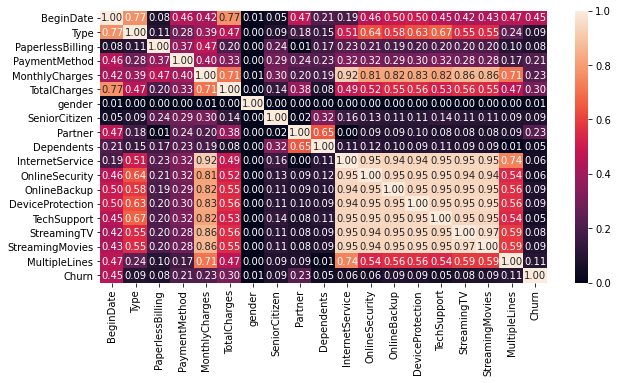

In [37]:
print(f"Корреляционный анализ количественных признаков объединенного датасета")
#plt.rcParams["figure.figsize"] = (7, 5)
sns.heatmap(merged_df.\
            phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges']),\
            annot=True,\
            fmt='.2f');
plt.show()

Корреляционный анализ показал, что мультиколлинеарность (связь более 0.90) имеет место между признаками из датасета internet_new.csv, а также между признаками InternetService и MonthlyCharges. Учтем это при выборе моделей машинного обучения.

###  Вывод по разделу Шаг 4. Исследовательский анализ объединённого датафрейма

Группы максимального риска оттока клиентов:
- Клиенты с долгосрочными контрактами (One year, Two year)
- Клиенты с электронным расчётным листом
- Кредитные карты с автоматическим списанием (Credit card (automatic)) и банковские трансферы с автоматическим списанием (Bank transfer (automatic))
- Пожилые клиенты (SeniorCitizen) и семейные клиенты (Partner и Dependents)
- Использование интернет-услуг через Fiber optic
- Подключенные дополнительные пакетные услуги
- Подключенный телефон к нескольким линиям одновременно.

Целевой признак имеет дисбаланс в распределении классов: 84% - действующие клиенты, 16% - клиенты расторгнувшие договор.

Корреляционный анализ показал, что мультиколлинеарность (связь более 0.90) имеет место между признаками из датасета internet_new.csv, а также между признаками InternetService и MonthlyCharges. Учтем это при выборе моделей машинного обучения.

## Шаг 5. Подготовка данных

In [38]:
RANDOM_STATE = 110825

# Создаём переменные для модели с соотношением train/test = 3:1
X_train, X_test, y_train, y_test = train_test_split(
    merged_df.drop(['Churn'], axis=1),
    merged_df['Churn'],
    stratify=merged_df['Churn'],  # добавляем стратификацию по целевому признаку
    random_state=RANDOM_STATE)

print('Размерность выборок:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()

Размерность выборок:
(5279, 18) (1760, 18) (5279,) (1760,)



In [39]:
# Создаём списки с названиями признаков
ohe_columns = ['BeginDate', 'InternetService', 'OnlineSecurity', \
              'OnlineBackup', 'DeviceProtection', 'TechSupport', \
              'StreamingTV', 'StreamingMovies', 'MultipleLines', \
              'gender', 'PaperlessBilling', 'SeniorCitizen', \
              'Partner', 'Dependents', 'Type', 'PaymentMethod'] # Признаки, которые невозможно упорядочить    
#ord_columns = ['Type', 'PaymentMethod'] # Признаки, которые можно ранжировать по какому-то критерию  
num_columns = X_train.select_dtypes(include=['number']).columns

In [40]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
    )

In [41]:
# Создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
#     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### Вывод по разделу 5  Шаг 5. Подготовка данных

Данные подготовлены для дальнейшего машинного обучения.

## Шаг 6. Обучение моделей машинного обучения

In [42]:
param_grid = [
    # Словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)], #, class_weight='balanced'
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
#        'models__min_samples_split': range(2, 15),
#        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },

    # Словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
#            class_weight='balanced'
        )],
#        'models__penalty': ['l1', 'l2'],
#        'models__solver': ['liblinear', 'saga'],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # Словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    
    # Словарь для модели SVC()
    {
       'models': [SVC(random_state=RANDOM_STATE, probability=True)], # probability=True for predict_proba, class_weight='balanced'
       'models__C': range(1, 5),
       'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [43]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    n_iter=50,  # Количество комбинаций
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
#    verbose=2  # Уровень детализации вывода
)

randomized_search.fit(X_train, y_train)

# Получаем лучший ROC-AUC на кросс-валидации
best_cv_roc_auc = randomized_search.best_score_

# Проверяем условие roc_auc >= 0.85
if best_cv_roc_auc >= 0.85:
    print(f"✅ Успех! ROC-AUC на кросс-валидации: {best_cv_roc_auc:.2f}")
else:
    print(f"❌ Неудача. ROC-AUC на кросс-валидации: {best_cv_roc_auc:.2f}")

print("Лучшие параметры:", randomized_search.best_params_)
print("Лучшая модель:", randomized_search.best_estimator_)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories

✅ Успех! ROC-AUC на кросс-валидации: 0.94
Лучшие параметры: {'preprocessor__num': StandardScaler(), 'models__C': 3, 'models': SVC(probability=True, random_state=110825)}
Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['BeginDate',
                                                   'InternetService',
                                                   'Onl

In [44]:
# Обучение и оценка DummyClassifier
dummy_сlassifier = DummyClassifier(strategy="stratified", random_state=RANDOM_STATE)  # Или "most_frequent", "prior", "uniform"
dummy_сlassifier.fit(X_train, y_train)
dummy_pred_proba = dummy_сlassifier.predict_proba(X_test)[:,1]
auc_dummy = roc_auc_score(y_test, dummy_pred_proba)
print(f"AUC-ROC DummyClassifier: {auc_dummy:.2f}")

AUC-ROC DummyClassifier: 0.50


In [45]:
# Проверяем лучшую модель на тестовой выборке
y_pred_test = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_test)
print(f"Roc_auc на тестовой выборке = {roc_auc:.2f}")

Roc_auc на тестовой выборке = 0.95


In [46]:
# Получаем предсказания классов (0 или 1), а не вероятности
y_pred_test_classes = randomized_search.best_estimator_.predict(X_test)

# Считаем Accuracy
acc = accuracy_score(y_test, y_pred_test_classes)
print(f"Accuracy на тестовой выборке: {acc:.2f}")

Accuracy на тестовой выборке: 0.93


Значение Accuracy = 0.93 означает, что модель правильно предсказывает отток у 93% клиентов в тестовой выборке. Это очень высокая точность, свидетельствующая о хорошем качестве модели.

Лучше справилась модель SVC с гиперпараметрами C=3, probability=True, random_state=110825. Метрика лучшей модели на кросс-валидации: 0.94, ее roc_auc на тестовой выборке = 0.95, что больше 0.85 и удовлетворяет условиям задачи.

Справочно, метрика константной модели DummyClassifier 0.50, что значительно ниже подобранной лучшей модели LogisticRegression.

<Figure size 576x432 with 0 Axes>

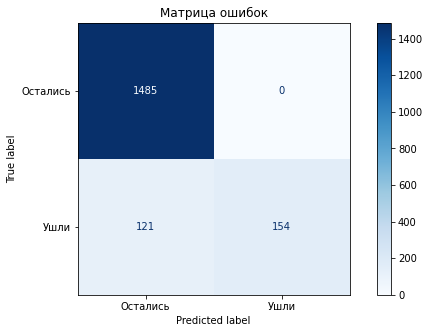

In [47]:
# Визуализация предсказаний
# Получаем предсказания лучшей модели
y_pred = randomized_search.best_estimator_.predict(X_test)
y_pred_proba = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# 1. Матрица ошибок
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Остались', 'Ушли']
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

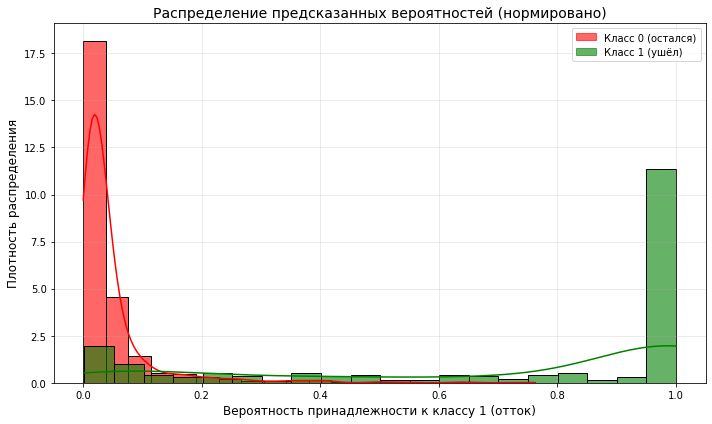

In [48]:
# 2. Распределение предсказанных вероятностей — без дублирования в легенде
plt.figure(figsize=(10, 6))

# Строим гистограммы без легенды
sns.histplot(
    y_pred_proba[y_test == 0], 
    bins=20, 
    kde=True,
    stat='density',
    color='red',
    alpha=0.6,
    label='_nolegend_'  # скрываем из легенды
)

sns.histplot(
    y_pred_proba[y_test == 1], 
    bins=20, 
    kde=True,
    stat='density',
    color='green',
    alpha=0.6,
    label='_nolegend_'
)

legend_elements = [
    Patch(facecolor='red', edgecolor='red', alpha=0.6, label='Класс 0 (остался)'),
    Patch(facecolor='green', edgecolor='green', alpha=0.6, label='Класс 1 (ушёл)')
]

plt.legend(handles=legend_elements)
plt.title('Распределение предсказанных вероятностей (нормировано)', fontsize=14)
plt.xlabel('Вероятность принадлежности к классу 1 (отток)', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 576x432 with 0 Axes>

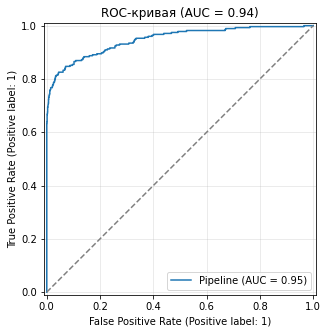

In [49]:
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(randomized_search.best_estimator_, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'ROC-кривая (AUC = {best_cv_roc_auc:.2f})')
plt.grid(alpha=0.3)
plt.show()

**Матрица ошибок**

1. Описание матрицы ошибок
   - Левый верхний элемент (0,0): 1485 -> True Negatives (TN): модель предсказала 'Остались' и это правильно.
   - Правый верхний (0,1): 0 -> False Positives (FP): модель предсказала 'Ушли', а на самом деле 'Остались'.
   - Левый нижний (1,0): 121 -> False Negatives (FN): модель предсказала 'Остались', а на самом деле 'Ушли'.
   - Правый нижний (1,1): 154 -> True Positives (TP): модель предсказала 'Ушли' и это правильно.


2. Критичность ошибок
- False Negatives (FN) — ошибка II рода, которая критична для бизнеса:
    - Клиенты, которые ушли, но модель их не обнаружила. Это означает потерю потенциальных действий по удержанию.
- False Positives (FP) — менее критичны:
    - Клиенты, которых ошибочно заподозрили в уходе, но они остались. Это приводит к избыточным затратам на маркетинг или сервис.

3. Ключевые метрики
- Recall (Полнота) = TP / (TP + FN) = 154 / (154 + 121) ≈ 0,56%
    - Показывает, какую долю реально ушедших клиентов модель обнаружила.
    - Высокий recall важен, так как цель — минимизировать пропуск ушедших клиентов.
- Precision (Точность) = TP / (TP + FP) = 154 / (154 + 0) ≈ 1,0%
    - Показывает, какая доля предсказанных как "ушедшие" действительно ушла.
    - Низкая precision означает, что среди "подозреваемых" много ложно-положительных.
- F1-score = 2 * (Precision * Recall) / (Precision + Recall) * 100 ≈ 72%
    - Баланс между точностью и полнотой.

4. Что важнее: recall или precision?
- Recall важнее, так как:
    - Пропуск ушедших клиентов (FN) критичен для бизнеса.
    - Ложные тревоги (FP) менее вредны, чем пропуск реальных уходов.

Высокое значение precision (1,0%) означает, что среди предсказанных "ушедших" нет ошибочных. Это может означает отсутствие неоправданных затрат на удержание.

**ROC-кривая**

Комментарии к ROC-кривой (AUC = 0.94)
1. Общая интерпретация ROC-кривой: ROC-кривая (Receiver Operating Characteristic) показывает, насколько хорошо модель отличает положительный класс (1) от отрицательного (0). AUC (Area Under Curve) = 0.94 — отличный результат (близко к максимуму 1.0). AUC > 0.9 — модель имеет высокую разделяющую способность.


2. Анализ графика
- Синяя линия (Pipeline) — ROC-кривая обученной модели.
- Начинается в (0, 0) — при нулевом пороге классификации (все объекты предсказываются как 0).
- Заканчивается в (1, 1) — при пороге, когда все объекты предсказываются как 1).
- Резкий подъём в начале — модель быстро наращивает True Positive Rate (TPR) при минимальном увеличении False Positive Rate (FPR). Это признак хорошего классификатора.
- Пунктирная серая линия — ROC-кривая случайного классификатора (AUC = 0.5). Чем дальше от неё синяя кривая, тем лучше.

3. Ключевые точки на графике
- При FPR = 0.2 (20% ложных срабатываний):
    - TPR ≈ 0.8 (80% истинных положительных) — модель корректно определяет 80% положительных классов, ошибаясь лишь в 20% отрицательных.
- При FPR = 0.4 (40% ложных срабатываний):
    - TPR ≈ 0.94 (94% истинных положительных) — почти идеальное распознавание положительного класса.

### Вывод по разделу  Шаг 6. Обучение моделей машинного обучения

Лучше справилась модель SVC с гиперпараметрами C=3, probability=True, random_state=110825. Метрика лучшей модели на кросс-валидации: 0.94, ее roc_auc на тестовой выборке = 0.95, что больше 0.85 и удовлетворяет условиям задачи.

Значение Accuracy = 0.93, а значит модель правильно предсказывает отток у 93% клиентов в тестовой выборке. Это очень высокая точность, свидетельствующая о хорошем качестве модели.

Справочно, метрика константной модели DummyClassifier 0.50, что значительно ниже подобранной лучшей модели LogisticRegression.

## Вывод

1. Загружены и подготовлены данные: проведены этапы загрузки и предобработки данных, проведен исследовательский анализ данных.

2. Обучены четыре модели. Лучше справилась модель SVC с гиперпараметрами C=3, probability=True, random_state=110825. Метрика лучшей модели на кросс-валидации: 0.94, ее roc_auc на тестовой выборке = 0.95, что больше 0.85 и удовлетворяет условиям задачи.

Значение Accuracy = 0.93, а значит модель правильно предсказывает отток у 93% клиентов в тестовой выборке. Это очень высокая точность, свидетельствующая о хорошем качестве модели.

Справочно, метрика константной модели DummyClassifier 0.50, что значительно ниже подобранной лучшей модели LogisticRegression.

**Рекомендации**
Проанализировать группы максимального риска оттока клиентов и разработать специальные условия для них:
- Клиенты с долгосрочными контрактами (One year, Two year)
- Клиенты с электронным расчётным листом
- Кредитные карты с автоматическим списанием (Credit card (automatic)) и банковские трансферы с автоматическим списанием (Bank transfer (automatic))
- Пожилые клиенты (SeniorCitizen) и семейные клиенты (Partner и Dependents)
- Использование интернет-услуг через Fiber optic
- Подключенные дополнительные пакетные услуги
- Подключенный телефон к нескольким линиям одновременно.